In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Problem - 1:	Getting Started with Data Exploration - Some Warm up</br> Exercises:**

1.	Data Exploration and Understanding:<br>
• Dataset Overview:<br>
    1.	Load the dataset and display the first 10 rows.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/WHR-2024-5CS037.csv')
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2.	Identify the number of rows and columns in the dataset.

In [6]:
data.shape

(143, 9)

3.	List all the columns and their data types.

In [7]:
data.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:
1.	Calculate the mean, median, and standard deviation for the Score column.


In [8]:
data['score'].mean()

5.52758041958042

In [9]:
data['score'].median()

5.785

In [10]:
data['score'].std()

1.1707165099442995

2.	Identify the country with the highest and lowest happiness scores.

In [11]:
highest=data['score'].max()
lowest=data['score'].min()
print(highest)
print(lowest)

7.741
1.721


• Missing Values:<br>
1. Check if there are any missing values in the dataset. If so, display the <br>total count for each column.


In [12]:
missingvalues=data.isnull().sum()
missingvalues

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:<br>
1.	Filter the dataset to show only the countries with a Score greater than 7.5.


In [13]:
filtered_data=data[data['score']>7.5]
filtered_data

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


2.	For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

In [14]:
sorteddata=filtered_data.sort_values(by='Log GDP per capita',ascending=False)
sorteddata.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:<br>
1. Create a new column called Happiness  Category that categorizes countries<br> into three categories based on their Score:<br>
Low−(Score < 4)<br>
Medium−(4≤Score≤6)<br>
High−(Score > 6)


In [15]:
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'
data['happiness category']=data['score'].apply(categorize_happiness)
data.sample(5)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category
24,Mexico,6.678,1.521,1.241,0.544,0.722,0.086,0.127,2.437,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
90,Georgia,5.185,1.467,0.990,0.524,0.680,0.000,0.174,1.349,Medium
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906,High
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low


2.	Data Visualizations:<br>
•	Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


In [16]:
top_10_happiest_score=data.sort_values(by='score',ascending=False).head(10)


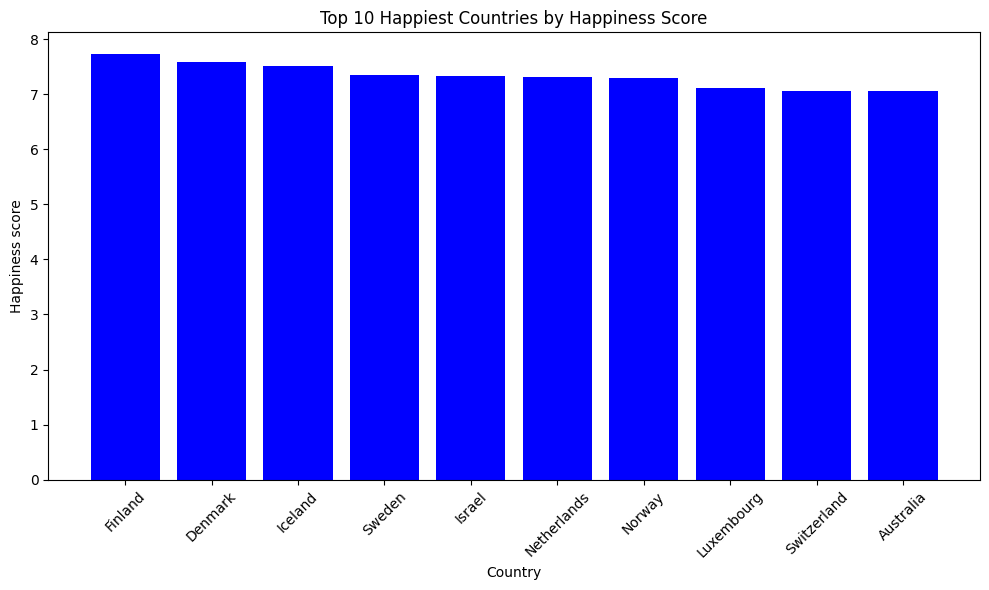

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest_score["Country name"], top_10_happiest_score["score"], color='blue')
plt.xlabel("Country")
plt.ylabel("Happiness score")
plt.title("Top 10 Happiest Countries by Happiness Score")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

•	Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

In [18]:
top_10_unhappiest=data.sort_values(by='score',ascending=True).head(10)

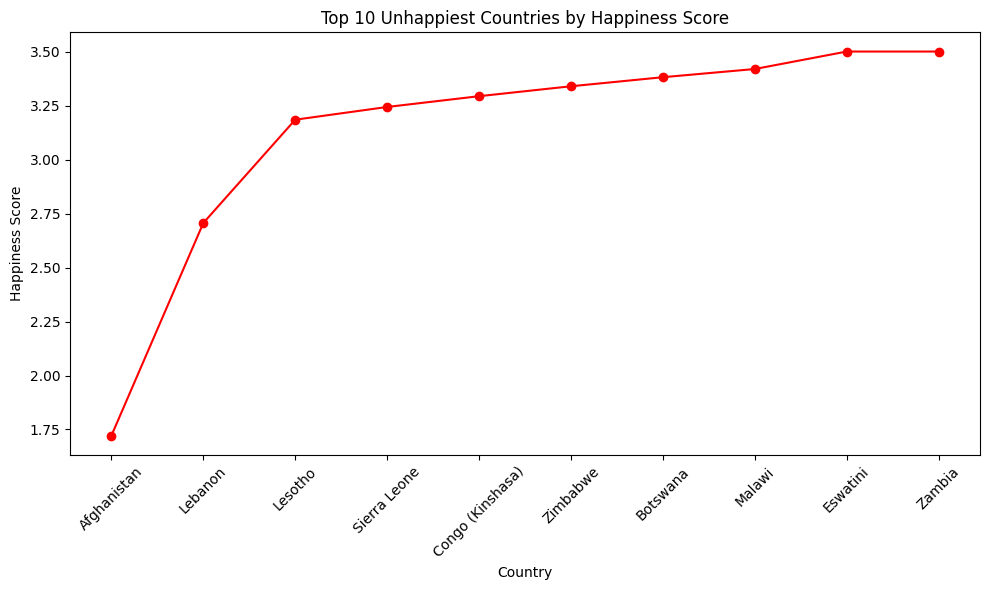

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red', linestyle='-')
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Unhappiest Countries by Happiness Score")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

•	Plot a histogram for the Score column to show its distribution and also interpret.

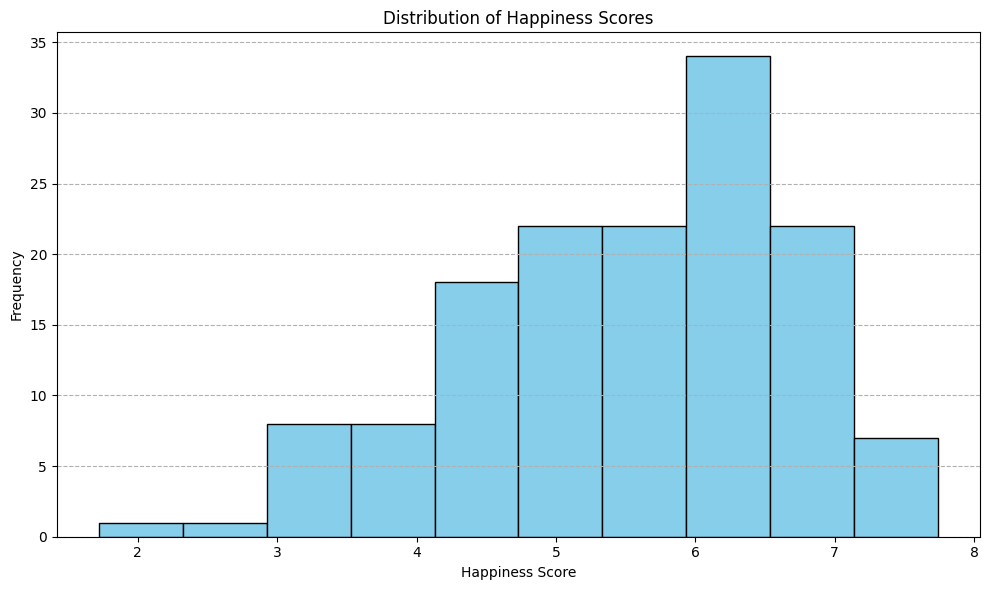

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data["score"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

•	Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

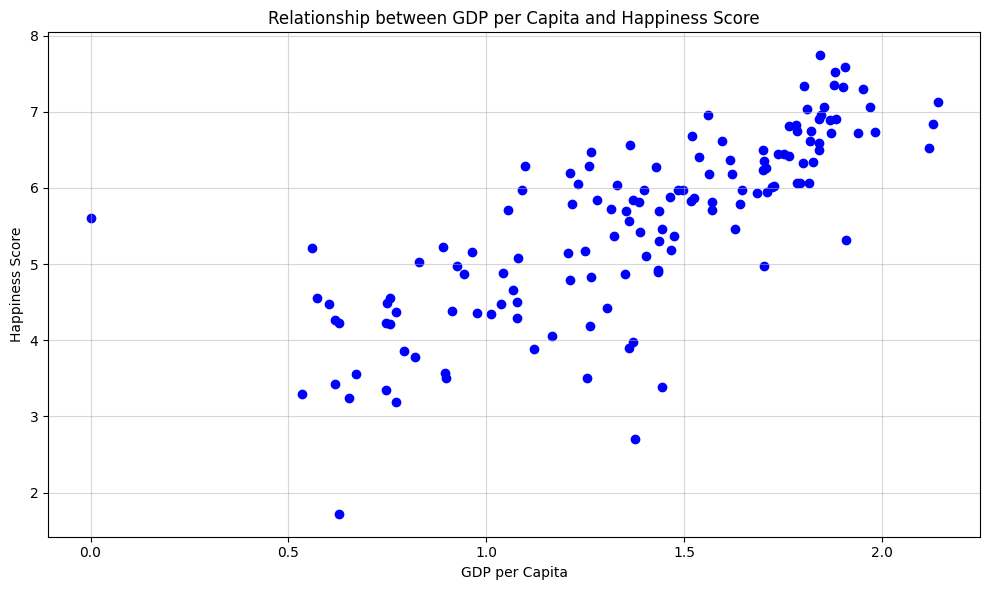

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Log GDP per capita"], data["score"], color='blue')
plt.title("Relationship between GDP per Capita and Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**3.2	Problem - 2 - Some Advance Data Exploration Task:<br>
Task - 1 - Setup Task - Preparing the South-Asia Dataset: Steps:**

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]


In [22]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2.	Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [23]:
southasiandata = data[data["Country name"].isin(south_asian_countries)]
southasiandata

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


3.	Save the filtered dataframe as separate CSV files for future use.

In [24]:
saveascsv = southasiandata.to_csv("/content/drive/MyDrive/Datasets/southasiancountries.csv", index=False)

**Task - 2 - Composite Score Ranking: Tasks:**<br>
1.	Using the SouthAsia DataFrame, create a new column called Composite Score<br> that combines the following metrics:<br>
Composite Score = 0.40×GDP per Capita+0.30×Social Support+0.30×Healthy Life Expectancy


In [64]:
southasiandata.loc[:,'Compositescore'] = 0.40 * southasiandata['Log GDP per capita'] + 0.30 * southasiandata['Social support'] + 0.30 * southasiandata['Healthy life expectancy']
southasiandata.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore,GDP score gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


2.	Rank the South Asian countries based on the Composite Score in descending order.

In [26]:
composite_score=southasiandata.sort_values(by='Compositescore',ascending=False).head()
composite_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774


3.	Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

In [27]:
top5countries=southasiandata.sort_values(by='Compositescore').head(5)
top5countries

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159


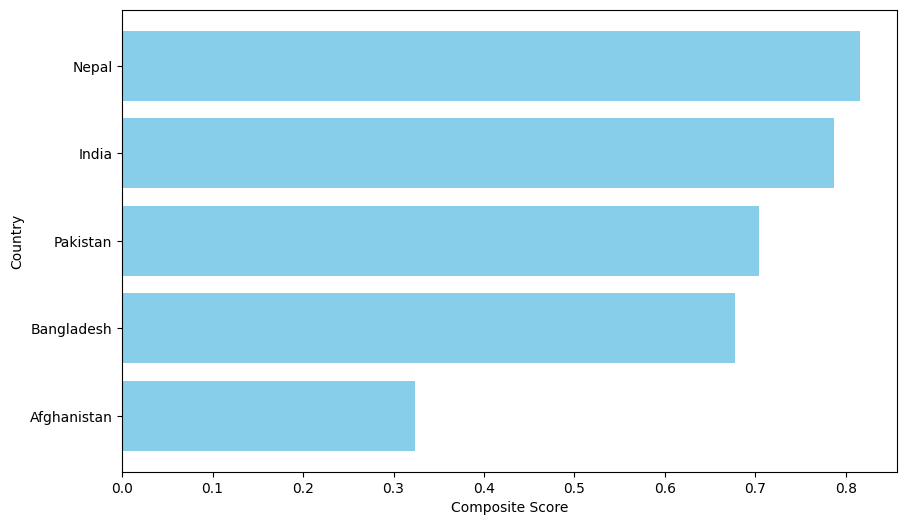

In [28]:
plt.figure(figsize=(10, 6))
plt.barh(top5countries['Country name'], top5countries['Compositescore'], color='skyblue')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

4.	Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

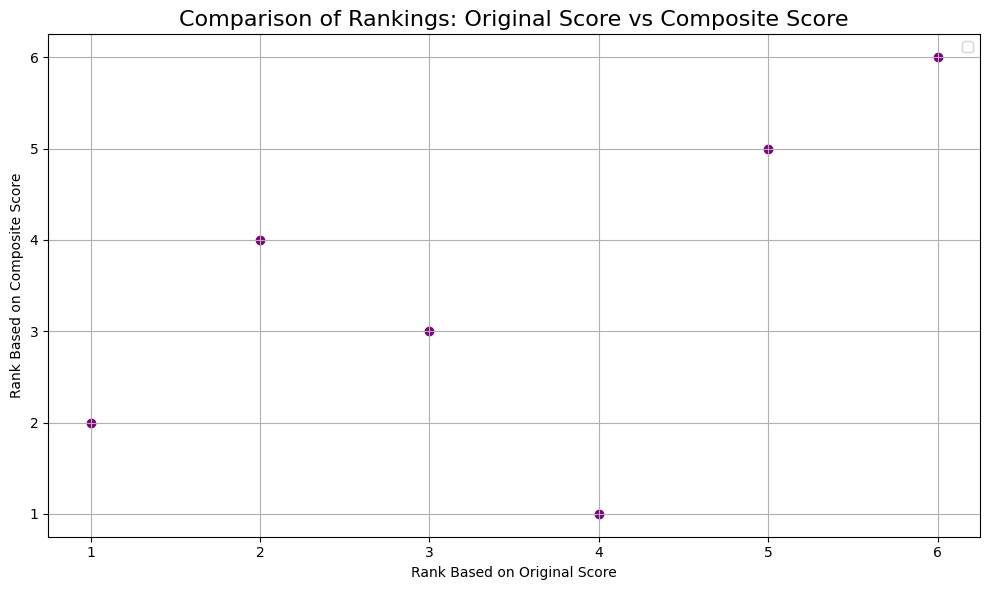

In [29]:
southasiandata_score = southasiandata["score"].rank(ascending=False)
southasiandata_composite = southasiandata["Compositescore"].rank(ascending=False)
plt.figure(figsize=(10, 6))
plt.scatter(southasiandata_score, southasiandata_composite, color="purple")
plt.title("Comparison of Rankings: Original Score vs Composite Score", fontsize=16)
plt.xlabel("Rank Based on Original Score")
plt.ylabel("Rank Based on Composite Score")
plt.legend()
plt.grid()
plt.tight_layout()

**Task - 3 - Outlier Detection: Tasks:**<br>
1.	Identify outlier countries in South Asia based on their Score and GDP per Capita.


In [30]:
q1 = southasiandata["Log GDP per capita"].quantile(0.25)
q3 = southasiandata["Log GDP per capita"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = southasiandata[(southasiandata["Log GDP per capita"] < lower_bound) | (southasiandata["Log GDP per capita"] > upper_bound)]
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


2.	Define outliers using the 1.5 × IQR rule.

In [31]:
q1_score = southasiandata["score"].quantile(0.25)
q3_score = southasiandata["score"].quantile(0.75)
iqr_score = q3_score - q1_score
lower_bound_score = q1_score - 1.5 * iqr_score
upper_bound_score = q3_score + 1.5 * iqr_score
outliers_score = southasiandata[(southasiandata["score"] < lower_bound_score) | (southasiandata["score"] > upper_bound_score)]
outliers_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


3.	Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.

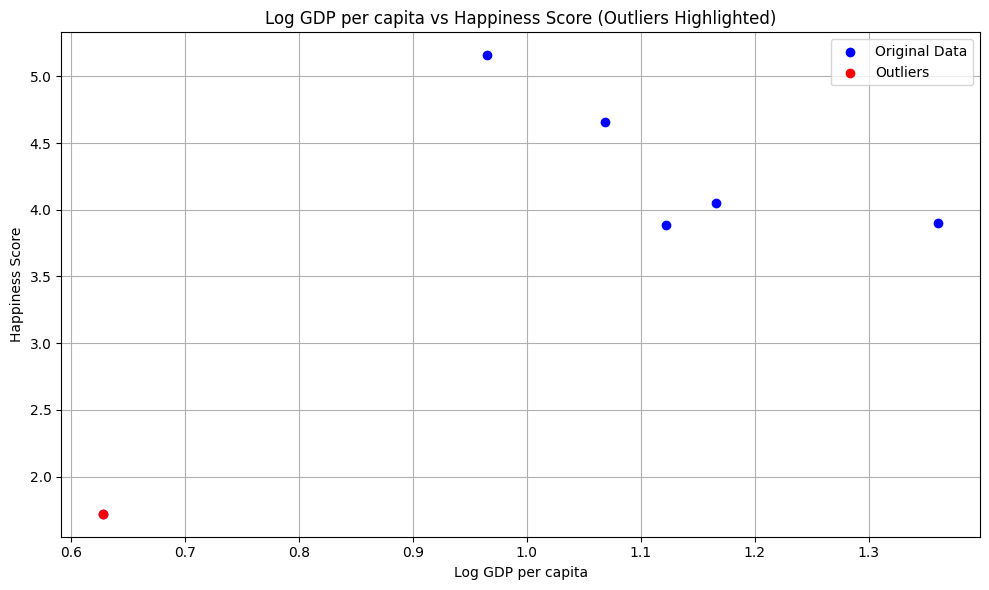

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(southasiandata["Log GDP per capita"], southasiandata["score"], color="blue", label="Original Data")
plt.scatter(outliers["Log GDP per capita"], outliers["score"], color="red", label="Outliers")
plt.title("Log GDP per capita vs Happiness Score (Outliers Highlighted)")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


**Task - 4 - Exploring Trends Across Metrics: Tasks:**<br>
1.	Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.


In [33]:
correlation_matrix = southasiandata['score'].corr(southasiandata['Generosity'])
correlation_matrix

0.874512371253192

In [34]:
correlation_matrix = southasiandata['score'].corr(southasiandata['Freedom to make life choices'])
correlation_matrix


0.8005185224163315

2.	Create scatter plots with trendlines for these metrics against the Score.

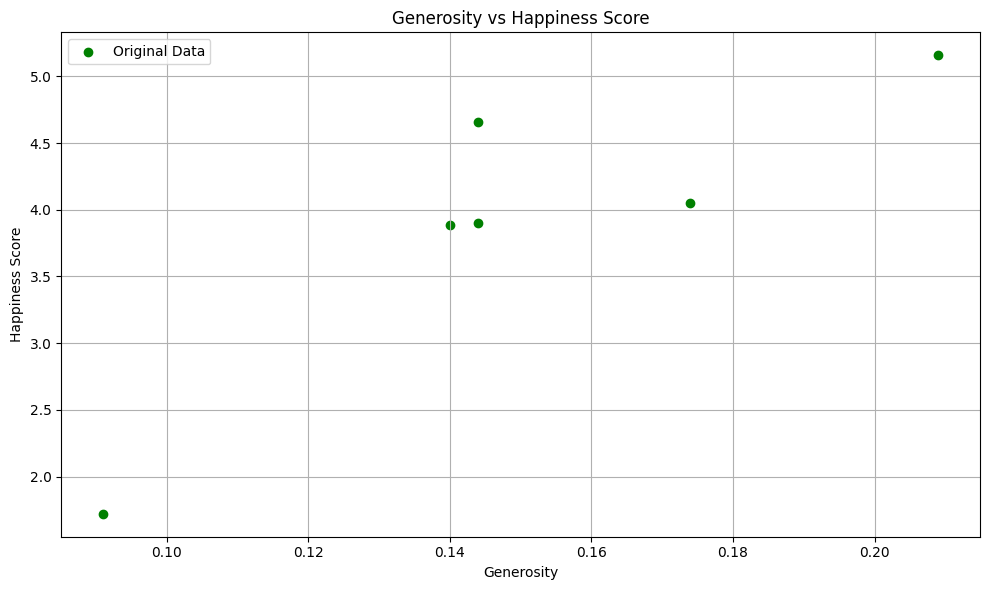

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(southasiandata["Generosity"], southasiandata["score"], color="green", label="Original Data")
plt.title("Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid()
plt.tight_layout()

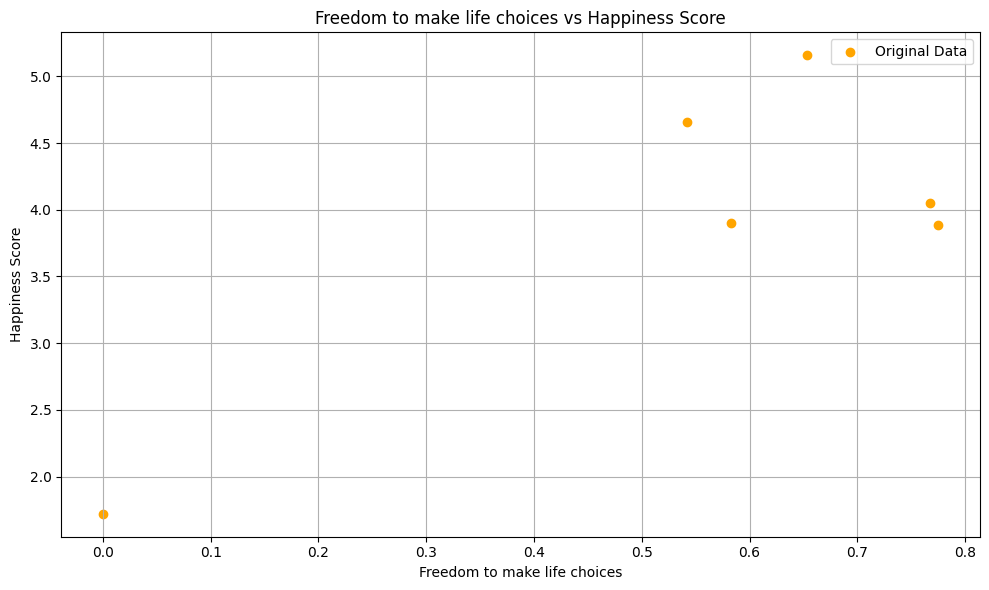

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(southasiandata["Freedom to make life choices"], southasiandata["score"], color="orange", label="Original Data")
plt.title("Freedom to make life choices vs Happiness Score")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid()
plt.tight_layout()

**Task - 5 - Gap Analysis:<br>
Tasks:**<br>
1.	Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.


In [65]:
southasiandata.loc[:,'GDP score gap']=southasiandata['Log GDP per capita']-southasiandata['score']
southasiandata.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore,GDP score gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


2.	Rank the South Asian countries by this gap in both ascending and descending order.

In [38]:
rankingsouthasia_descending=southasiandata.sort_values(by='GDP score gap',ascending=False)
rankingsouthasia_descending

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore,GDP score gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193


In [39]:
rankingsouthasia_ascending=southasiandata.sort_values(by='GDP score gap',ascending=True)
rankingsouthasia_ascending

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore,GDP score gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


3.	Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

In [40]:
top3countries_largestpositive=rankingsouthasia_descending.head(3)
top3countries_largestpositive

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore,GDP score gap
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764


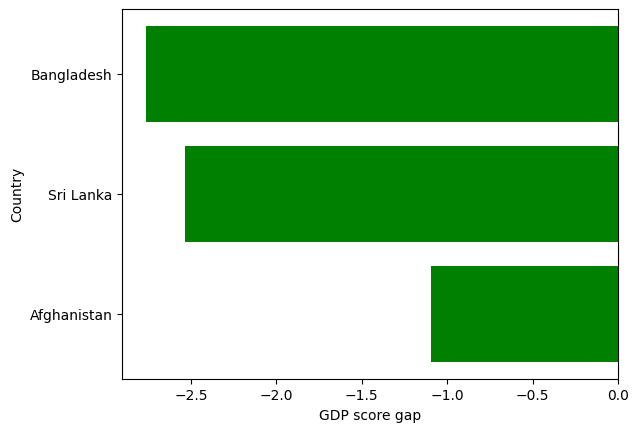

In [41]:
plt.barh(top3countries_largestpositive["Country name"], top3countries_largestpositive["GDP score gap"], color='green')
plt.ylabel("Country")
plt.xlabel("GDP score gap")
plt.show()

In [42]:
top3countries_largestnegative=rankingsouthasia_ascending.head(3)
top3countries_largestnegative

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category,Compositescore,GDP score gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888


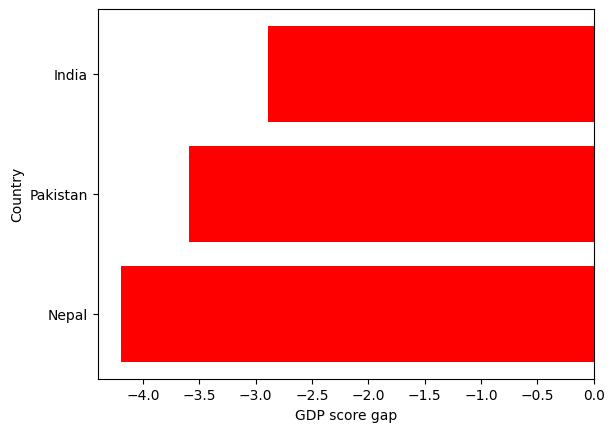

In [43]:
plt.barh(top3countries_largestnegative["Country name"], top3countries_largestnegative["GDP score gap"], color='red')
plt.ylabel("Country")
plt.xlabel("GDP score gap")
plt.show()

**3.3	Problem - 3 - Comparative Analysis:<br>
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset: Tasks:**
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list:<br> middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]



In [44]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [45]:
middleeastdata = data[data["Country name"].isin(middle_east_countries)]
middleeastdata.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium


Complete the following task:<br>
1.	Descriptive Statistics:<br>
•	Calculate the mean, Standard deviation of the score for both South Asia and Middle East.


In [46]:
mean_southasiancountries = southasiandata["score"].mean()
mean_middleeastcountries = middleeastdata["score"].mean()
print("Mean score for South Asian countries:", mean_southasiancountries)
print("Mean score for Middle Eastern countries:", mean_middleeastcountries)
std_southasiancountries = southasiandata["score"].std()
std_middleeastcountries = middleeastdata["score"].std()
print("Standard deviation of scores for South Asian countries:", std_southasiancountries)
print("Standard deviation of scores for Middle Eastern countries:", std_middleeastcountries)

Mean score for South Asian countries: 3.895666666666667
Mean score for Middle Eastern countries: 5.412100000000001
Standard deviation of scores for South Asian countries: 1.1770690152521504
Standard deviation of scores for Middle Eastern countries: 1.5662011684327144


2.	Top and Bottom Performers:<br>
•	Identify the top 3 and bottom 3 countries in each region based on the score.


In [47]:
top3countries=middleeastdata.sort_values(by='score',ascending=False).head(3)
top3countries

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High


In [48]:
bottom3countries=middleeastdata.sort_values(by='score',ascending=True).head(3)
bottom3countries

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium


In [49]:
top3southasiancountries=southasiandata.sort_values(by='score',ascending=False).head(3)
bottom3southasiancountries=southasiandata.sort_values(by='score',ascending=True).head(3)

•	Plot bar charts comparing these charts.

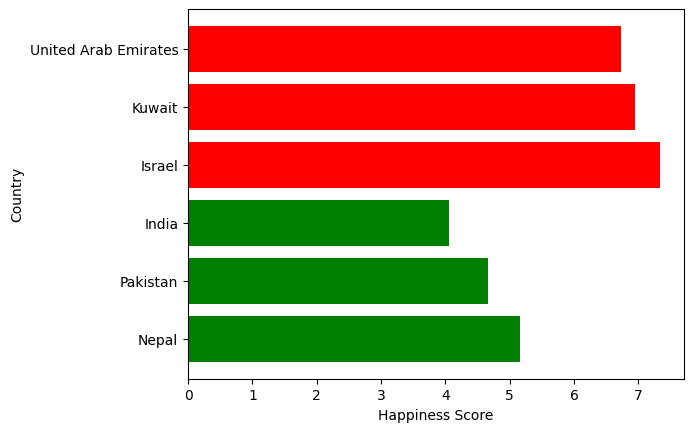

In [50]:
plt.barh(top3southasiancountries["Country name"], top3southasiancountries["score"], color='green')
plt.barh(top3countries["Country name"], top3countries["score"], color='red')
plt.ylabel("Country")
plt.xlabel("Happiness Score")
plt.show()

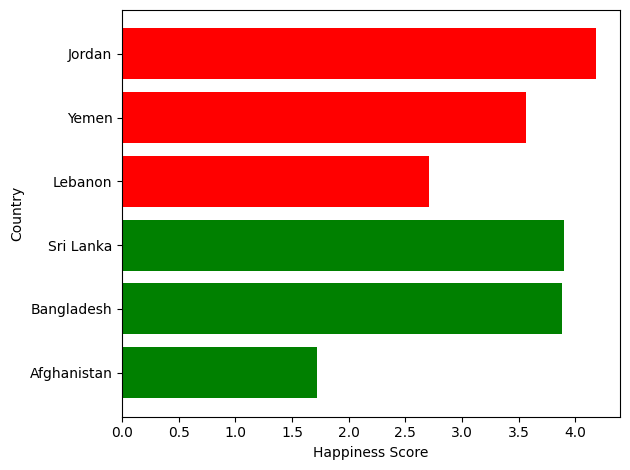

In [51]:
plt.barh(bottom3southasiancountries["Country name"], bottom3southasiancountries["score"], color='green')
plt.barh(bottom3countries["Country name"], bottom3countries["score"], color='red')
plt.ylabel("Country")
plt.xlabel("Happiness Score")
plt.tight_layout()

3.	Metric Comparisons:<br>
•	Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.


In [52]:
matrices=["Log GDP per capita","Social support","Healthy life expectancy"]
southasian_metrics=southasiandata[matrices].mean()
middleeast_metrics=middleeastdata[matrices].mean()
combined_matrices=pd.concat([southasian_metrics,middleeast_metrics],axis=1)
combined_matrices.columns=["South Asia","Middle East"]
combined_matrices

,South Asia,Middle East
Log GDP per capita,1.051833,1.496333
Social support,0.611833,1.152778
Healthy life expectancy,0.420333,0.554111


•	Which metrics show the largest disparity between the two regions?

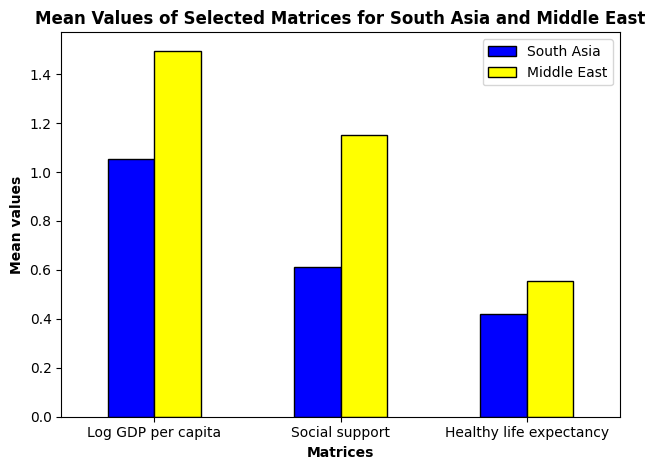

In [53]:
combined_matrices.plot(kind='bar',edgecolor='black',color=['blue','yellow'])
plt.xlabel('Matrices',fontweight='bold')
plt.ylabel('Mean values',fontweight='bold')
plt.xticks(rotation=0)
plt.title('Mean Values of Selected Matrices for South Asia and Middle East',fontweight='bold')
plt.tight_layout()

4.	Happiness Disparity:<br>
•	Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.


In [54]:
range_happiness=middleeastdata['score'].max()-middleeastdata['score'].min()
range_happiness

4.634

In [55]:
std_score=middleeastdata['score'].std()
cv_middleeastdata=(std_score/mean_middleeastcountries)*100
cv_middleeastdata


28.938880812119404

In [56]:
cv_southasiancountries=(std_southasiancountries/mean_southasiancountries)*100
cv_southasiancountries

30.21482883337427

5.	Correlation Analysis:<br>
•	Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.


In [57]:
cor_score_freedom=middleeastdata['score'].corr(middleeastdata['Freedom to make life choices'])
cor_score_freedom

0.8632202433827544

In [58]:
cor_score_Generosity=middleeastdata['score'].corr(middleeastdata['Generosity'])
cor_score_Generosity

0.6275236536964182

•	Create scatter plots to visualize and interpret the relationships.

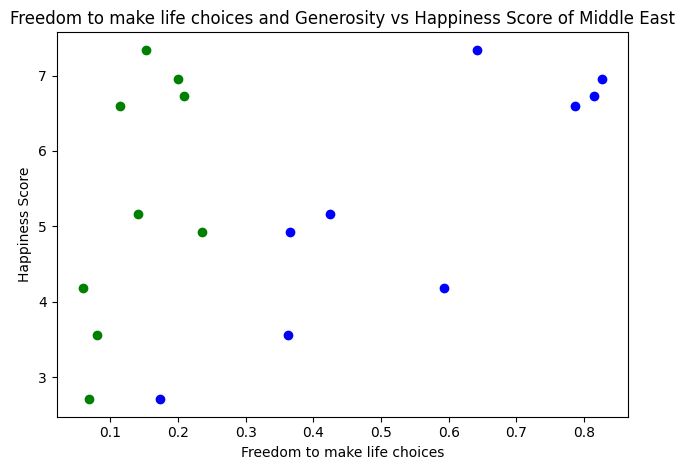

In [59]:
plt.scatter(middleeastdata["Freedom to make life choices"], middleeastdata["score"], color="blue", label="Original Data")
plt.scatter(middleeastdata["Generosity"],middleeastdata['score'],color='green')
plt.title("Freedom to make life choices and Generosity vs Happiness Score of Middle East")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.tight_layout()

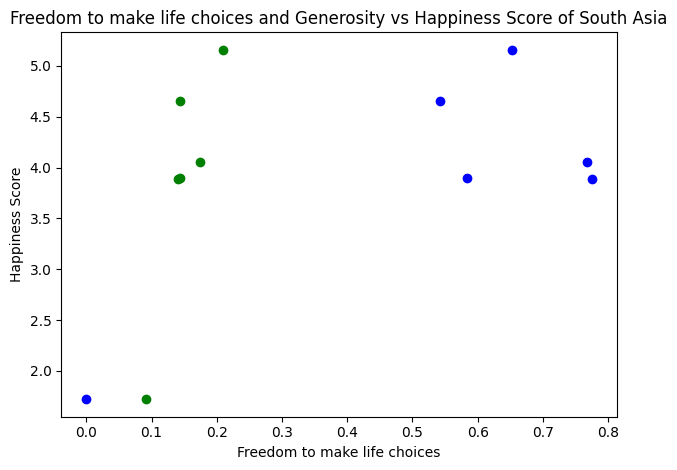

In [60]:
plt.scatter(southasiandata["Freedom to make life choices"], southasiandata["score"], color="blue", label="Original Data")
plt.scatter(southasiandata["Generosity"],southasiandata['score'],color='green')
plt.title("Freedom to make life choices and Generosity vs Happiness Score of South Asia")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Happiness Score")
plt.tight_layout()

6.	Outlier Detection:<br>
•	Identify outlier countries in both regions based on Score and GDP per Capita.


In [61]:
q1_score = middleeastdata["score"].quantile(0.25)
q3_score = middleeastdata["score"].quantile(0.75)
iqr_score = q3_score - q1_score
lower_bound_score = q1_score - 1.5 * iqr_score
upper_bound_score = q3_score + 1.5 * iqr_score
outliers_score = middleeastdata[(middleeastdata["score"] < lower_bound_score) | (middleeastdata["score"] > upper_bound_score)]
outliers_score

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category


In [62]:
q1_gdp=middleeastdata["Log GDP per capita"].quantile(0.25)
q3_gdp=middleeastdata["Log GDP per capita"].quantile(0.75)
iqr_gdp=q3_gdp-q1_gdp
lower_bound_gdp=q1_gdp-1.5*iqr_gdp
upper_bound_gdp=q3_gdp+1.5*iqr
outliers_gdp=middleeastdata[(middleeastdata["Log GDP per capita"]<lower_bound_gdp)|(middleeastdata["Log GDP per capita"]>upper_bound_gdp)]
outliers_gdp

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness category


7.	Visualization:<br>
•	Create boxplots comparing the distribution of Score between South Asia and the Middle East.


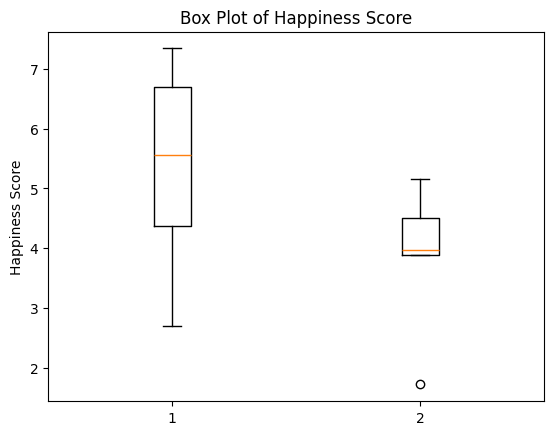

In [63]:
plt.boxplot([middleeastdata["score"],southasiandata['score']])
plt.ylabel("Happiness Score")
plt.title("Box Plot of Happiness Score")
plt.show()